In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
data = pd.read_csv('archive/AppleStore.csv')
data.head()

Unnamed: 0         id                                         track_name  \
0           1  281656475                                    PAC-MAN Premium   
1           2  281796108                          Evernote - stay organized   
2           3  281940292    WeatherBug - Local Weather, Radar, Maps, Alerts   
3           4  282614216  eBay: Best App to Buy, Sell, Save! Online Shop...   
4           5  282935706                                              Bible   

   size_bytes currency  price  rating_count_tot  rating_count_ver  \
0   100788224      USD   3.99             21292                26   
1   158578688      USD   0.00            161065                26   
2   100524032      USD   0.00            188583              2822   
3   128512000      USD   0.00            262241               649   
4    92774400      USD   0.00            985920              5320   

   user_rating  user_rating_ver     ver cont_rating   prime_genre  \
0          4.0              4.5   6.3.5          4+         Games   
1          4.0              3.5   8.2.2          4+  Productivity   
2          3.5              4.5   5.0.0          4+       Weather   
3          4.0              4.5  5.10.0         12+      Shopping   
4          4.5              5.0   7.5.1          4+     Reference   

   sup_devices.num  ipadSc_urls.num  lang.num  vpp_lic  
0               38                5        10        1  
1               37                5        23        1  
2               37                5         3        1  
3               37                5         9        1  
4               37                5        45        1

In [3]:
num_cols = [
    'size_bytes',
    'price',
    'rating_count_tot',
    'rating_count_ver',
    'sup_devices.num',
    'ipadSc_urls.num',
    'lang.num',
    'cont_rating',
]

cat_cols = [
    'currency',
    'prime_genre'
]

target_col = 'user_rating'

cols = num_cols + cat_cols + [target_col]
data[cols].head()

size_bytes  price  rating_count_tot  rating_count_ver  sup_devices.num  \
0   100788224   3.99             21292                26               38   
1   158578688   0.00            161065                26               37   
2   100524032   0.00            188583              2822               37   
3   128512000   0.00            262241               649               37   
4    92774400   0.00            985920              5320               37   

   ipadSc_urls.num  lang.num cont_rating currency   prime_genre  user_rating  
0                5        10          4+      USD         Games          4.0  
1                5        23          4+      USD  Productivity          4.0  
2                5         3          4+      USD       Weather          3.5  
3                5         9         12+      USD      Shopping          4.0  
4                5        45          4+      USD     Reference          4.5

In [4]:
data = data[cols]
data['cont_rating'] = data['cont_rating'].str.slice(0, -1).astype(int)
data.head()

size_bytes  price  rating_count_tot  rating_count_ver  sup_devices.num  \
0   100788224   3.99             21292                26               38   
1   158578688   0.00            161065                26               37   
2   100524032   0.00            188583              2822               37   
3   128512000   0.00            262241               649               37   
4    92774400   0.00            985920              5320               37   

   ipadSc_urls.num  lang.num  cont_rating currency   prime_genre  user_rating  
0                5        10            4      USD         Games          4.0  
1                5        23            4      USD  Productivity          4.0  
2                5         3            4      USD       Weather          3.5  
3                5         9           12      USD      Shopping          4.0  
4                5        45            4      USD     Reference          4.5

In [5]:
data.isna().mean()

size_bytes          0.0
price               0.0
rating_count_tot    0.0
rating_count_ver    0.0
sup_devices.num     0.0
ipadSc_urls.num     0.0
lang.num            0.0
cont_rating         0.0
currency            0.0
prime_genre         0.0
user_rating         0.0
dtype: float64

In [6]:
for col in cat_cols:
    print(f'{col} DISTRIBUTION:')
    print(data[col].value_counts())
    print()

currency DISTRIBUTION:
currency
USD    7197
Name: count, dtype: int64

prime_genre DISTRIBUTION:
prime_genre
Games                3862
Entertainment         535
Education             453
Photo & Video         349
Utilities             248
Health & Fitness      180
Productivity          178
Social Networking     167
Lifestyle             144
Music                 138
Shopping              122
Sports                114
Book                  112
Finance               104
Travel                 81
News                   75
Weather                72
Reference              64
Food & Drink           63
Business               57
Navigation             46
Medical                23
Catalogs               10
Name: count, dtype: int64



In [7]:
data = data.drop(columns=['currency'])
cat_cols.remove('currency')

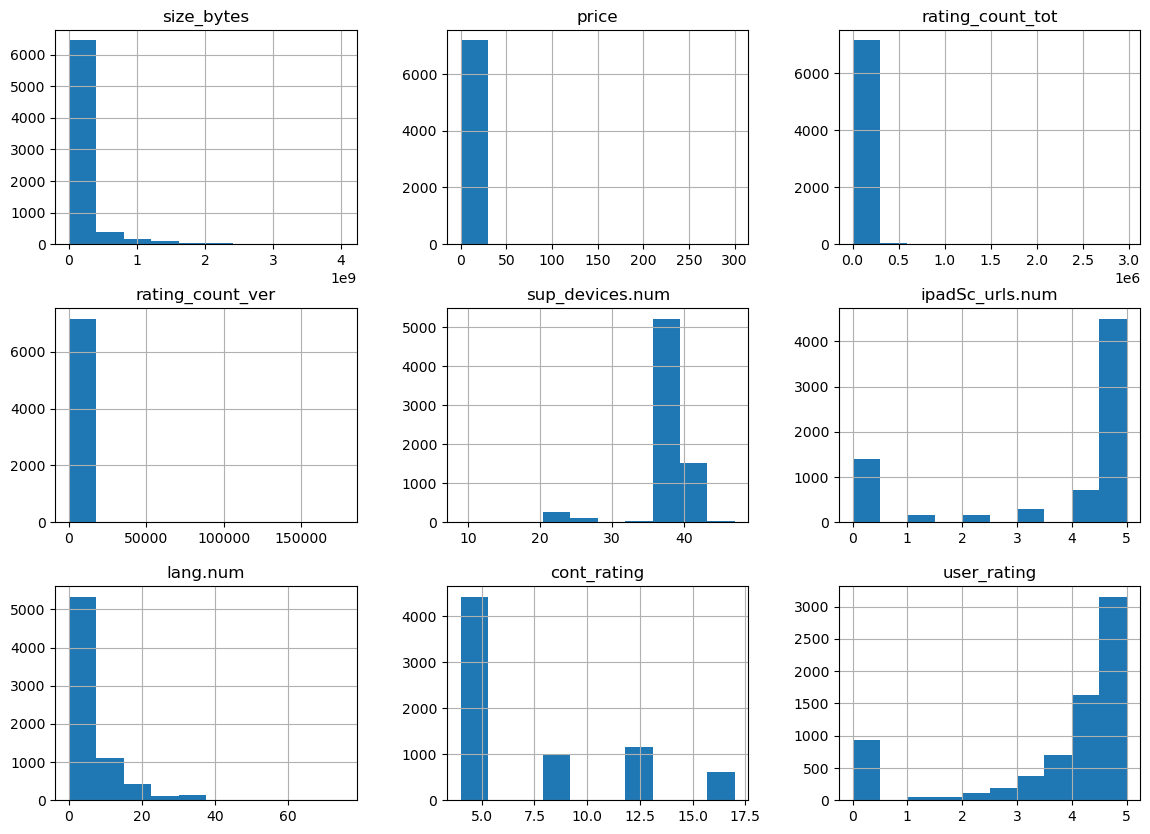

In [8]:
data.hist(column=cat_cols+num_cols+[target_col], figsize=(14,10))
None

In [9]:
data.corr(numeric_only=True).style.background_gradient(cmap='coolwarm').format(precision=2)

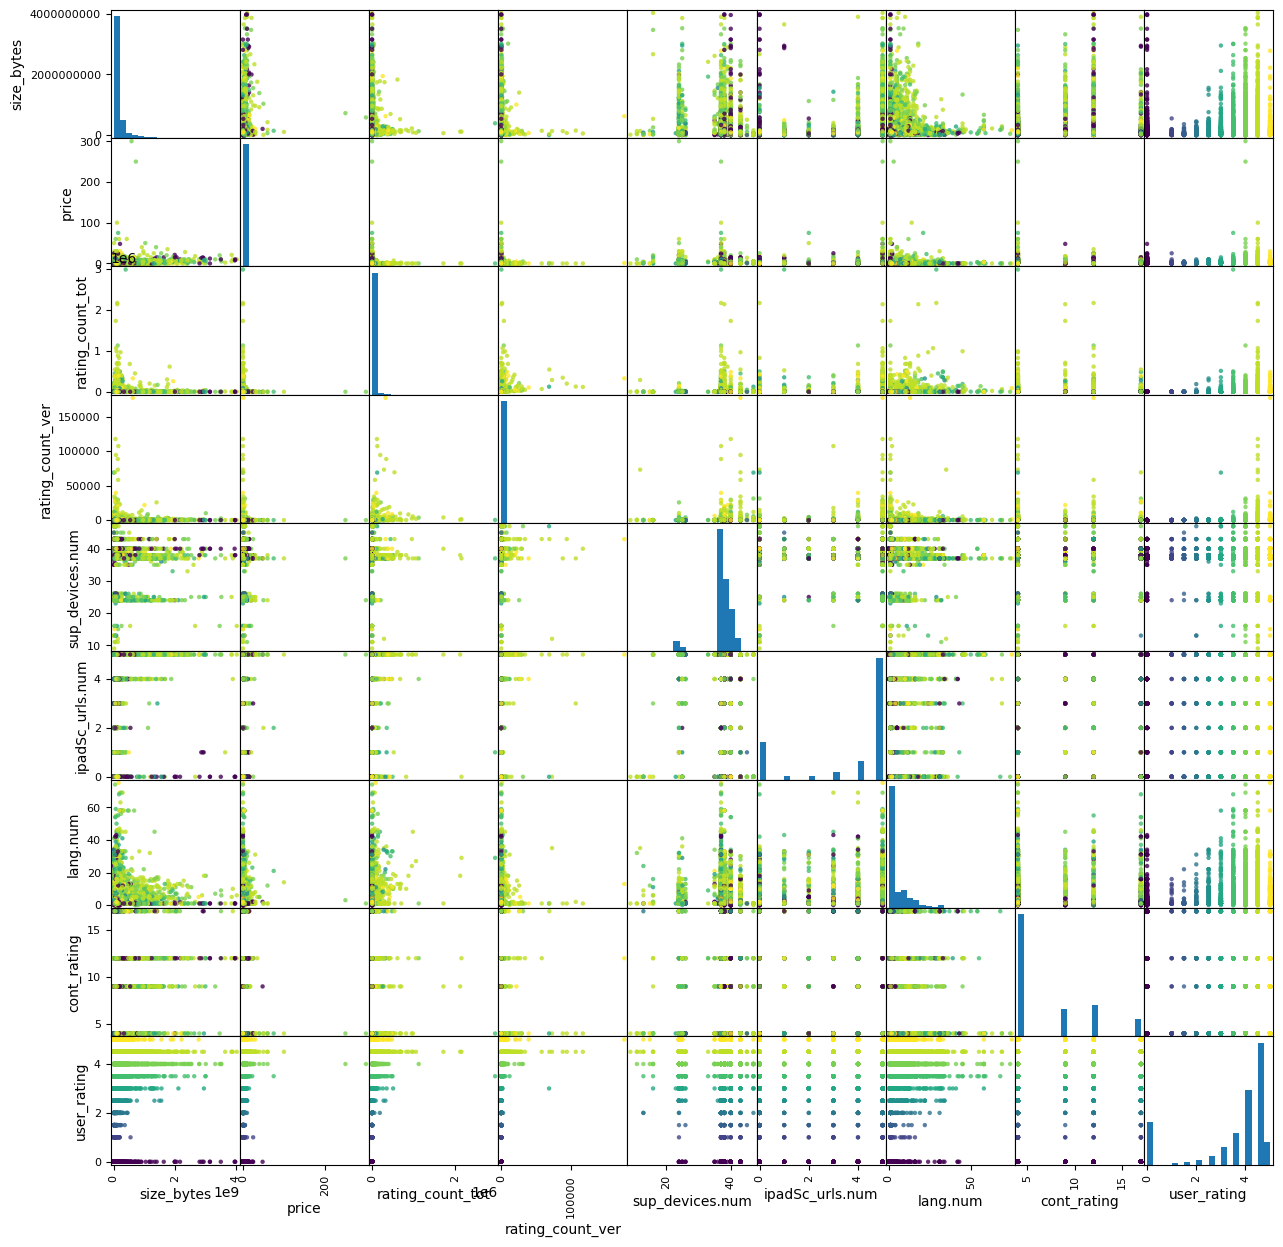

In [10]:
pd.plotting.scatter_matrix(data, c=data[target_col], figsize=(15,15), marker='o',
                          hist_kwds={'bins': 20}, s=10, alpha=0.8)
None

In [11]:
data['is_free'] = data['price'] == 0
cat_cols.append('is_free')
data.head()

size_bytes  price  rating_count_tot  rating_count_ver  sup_devices.num  \
0   100788224   3.99             21292                26               38   
1   158578688   0.00            161065                26               37   
2   100524032   0.00            188583              2822               37   
3   128512000   0.00            262241               649               37   
4    92774400   0.00            985920              5320               37   

   ipadSc_urls.num  lang.num  cont_rating   prime_genre  user_rating  is_free  
0                5        10            4         Games          4.0    False  
1                5        23            4  Productivity          4.0     True  
2                5         3            4       Weather          3.5     True  
3                5         9           12      Shopping          4.0     True  
4                5        45            4     Reference          4.5     True

In [12]:
a = pd.DataFrame.from_dict({'categorial': ['a', 'b', 'a', 'c']})
a

categorial
0          a
1          b
2          a
3          c

In [13]:
pd.get_dummies(a)

categorial_a  categorial_b  categorial_c
0          True         False         False
1         False          True         False
2          True         False         False
3         False         False          True

In [14]:
data = pd.get_dummies(data, columns=cat_cols)
data.head()

size_bytes  price  rating_count_tot  rating_count_ver  sup_devices.num  \
0   100788224   3.99             21292                26               38   
1   158578688   0.00            161065                26               37   
2   100524032   0.00            188583              2822               37   
3   128512000   0.00            262241               649               37   
4    92774400   0.00            985920              5320               37   

   ipadSc_urls.num  lang.num  cont_rating  user_rating  prime_genre_Book  ...  \
0                5        10            4          4.0             False  ...   
1                5        23            4          4.0             False  ...   
2                5         3            4          3.5             False  ...   
3                5         9           12          4.0             False  ...   
4                5        45            4          4.5             False  ...   

   prime_genre_Productivity  prime_genre_Reference  prime_genre_Shopping  \
0                     False                  False                 False   
1                      True                  False                 False   
2                     False                  False                 False   
3                     False                  False                  True   
4                     False                   True                 False   

   prime_genre_Social Networking  prime_genre_Sports  prime_genre_Travel  \
0                          False               False               False   
1                          False               False               False   
2                          False               False               False   
3                          False               False               False   
4                          False               False               False   

   prime_genre_Utilities  prime_genre_Weather  is_free_False  is_free_True  
0                  False                False           True         False  
1                  False                False          False          True  
2                  False                 True          False          True  
3                  False                False          False          True  
4                  False                False          False          True  

[5 rows x 34 columns]

In [15]:
cat_cols_new = []
for col_name in cat_cols:
    cat_cols_new.extend(filter(lambda x: x.startswith(col_name), data.columns))
cat_cols = cat_cols_new
cat_cols

['prime_genre_Book',
 'prime_genre_Business',
 'prime_genre_Catalogs',
 'prime_genre_Education',
 'prime_genre_Entertainment',
 'prime_genre_Finance',
 'prime_genre_Food & Drink',
 'prime_genre_Games',
 'prime_genre_Health & Fitness',
 'prime_genre_Lifestyle',
 'prime_genre_Medical',
 'prime_genre_Music',
 'prime_genre_Navigation',
 'prime_genre_News',
 'prime_genre_Photo & Video',
 'prime_genre_Productivity',
 'prime_genre_Reference',
 'prime_genre_Shopping',
 'prime_genre_Social Networking',
 'prime_genre_Sports',
 'prime_genre_Travel',
 'prime_genre_Utilities',
 'prime_genre_Weather',
 'is_free_False',
 'is_free_True']

In [16]:
from sklearn.preprocessing import StandardScaler

pca = StandardScaler()
pca.fit(data[num_cols + cat_cols])

X = pca.transform(data[num_cols + cat_cols])

X = pca.fit_transform(data[num_cols + cat_cols])
X

array([[-0.27380615,  0.38812569,  0.11090232, ..., -0.10052494,
         1.13635756, -1.13635756],
       [-0.11291148, -0.29596024,  1.95647669, ..., -0.10052494,
        -0.88000471,  0.88000471],
       [-0.27454169, -0.29596024,  2.31982667, ...,  9.94778032,
        -0.88000471,  0.88000471],
       ...,
       [-0.24447871,  0.04522548, -0.17004096, ..., -0.10052494,
         1.13635756, -1.13635756],
       [-0.283696  , -0.29596024, -0.16911668, ..., -0.10052494,
        -0.88000471,  0.88000471],
       [-0.30134036, -0.29596024, -0.17019941, ..., -0.10052494,
        -0.88000471,  0.88000471]])

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, data[target_col], test_size=0.2)

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score, mean_squared_error

In [20]:
def print_metrics(y_preds, y):
    print(f'R^2: {r2_score(y_preds, y)}')
    print(f'MSE: {mean_squared_error(y_preds, y)}')

In [21]:
lr = LinearRegression()
lr.fit(X_train, y_train)

print_metrics(lr.predict(X_test), y_test)

R^2: -5.087037531375444
MSE: 2.120400252020398


In [22]:
# knn = KNeighborsRegressor(n_neighbors=5)
# knn.fit(X_train, y_train)

# print_metrics(knn.predict(X_test), y_test)

In [23]:
from sklearn.metrics import r2_score, mean_squared_error, make_scorer
from sklearn.model_selection import cross_validate

In [24]:
cross_validate(LinearRegression(), X, data[target_col], cv=5,
               scoring={'r2_score': make_scorer(r2_score, ),
                        'mean_squared_error': make_scorer(mean_squared_error)})

{'fit_time': array([0.00722814, 0.00615001, 0.00496006, 0.00587821, 0.00467014]),
 'score_time': array([0.00133419, 0.00117207, 0.00115895, 0.00114489, 0.00099397]),
 'test_r2_score': array([-0.83163137,  0.063205  ,  0.11561247,  0.1099986 ,  0.07095117]),
 'test_mean_squared_error': array([1.66673862, 1.49237991, 1.9406805 , 2.8173066 , 2.93238589])}

In [25]:
# cross_validate(KNeighborsRegressor(), X, data[target_col], cv=5,
#                scoring={'r2_score': make_scorer(r2_score, ),
#                         'mean_squared_error': make_scorer(mean_squared_error)})

In [26]:
from sklearn.model_selection import GridSearchCV

In [28]:
gbr_grid_search = GridSearchCV(LinearRegression(),
                               [{'fit_intercept': [True, False]}],
                               cv=5,
                               scoring=make_scorer(mean_squared_error),
                               verbose=10)
gbr_grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits
[CV 1/5; 1/2] START fit_intercept=True..........................................
[CV 1/5; 1/2] END ...........fit_intercept=True;, score=1.952 total time=   0.0s
[CV 2/5; 1/2] START fit_intercept=True..........................................
[CV 2/5; 1/2] END ...........fit_intercept=True;, score=2.096 total time=   0.0s
[CV 3/5; 1/2] START fit_intercept=True..........................................
[CV 3/5; 1/2] END ...........fit_intercept=True;, score=2.020 total time=   0.0s
[CV 4/5; 1/2] START fit_intercept=True..........................................
[CV 4/5; 1/2] END ...........fit_intercept=True;, score=1.851 total time=   0.0s
[CV 5/5; 1/2] START fit_intercept=True..........................................
[CV 5/5; 1/2] END ...........fit_intercept=True;, score=2.016 total time=   0.0s
[CV 1/5; 2/2] START fit_intercept=False.........................................
[CV 1/5; 2/2] END .........fit_intercept=False;, 

GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid=[{'fit_intercept': [True, False]}],
             scoring=make_scorer(mean_squared_error), verbose=10)

In [33]:
print(gbr_grid_search.best_params_)
print(gbr_grid_search.best_score_)
print(gbr_grid_search.best_estimator_)

{'fit_intercept': False}
14.648338553861743
LinearRegression(fit_intercept=False)


In [36]:
print_metrics(gbr_grid_search.predict(X_test), y_test)

R^2: -40.816763756711886
MSE: 14.428923028707505


In [39]:
from sklearn.model_selection import KFold

In [40]:
kf = KFold(n_splits=5)

In [41]:
model = LinearRegression()

In [44]:
metrics = []
for train_ind, test_ind in kf.split(X_train):
    model.fit(X_train[train_ind], y_train.values[train_ind])
    pred = model.predict(X_train[test_ind])
    metrics.append(mean_squared_error(y_train.values[test_ind], pred))

In [45]:
metrics

[1.9523268834245455,
 2.0964656166244207,
 2.019962414545296,
 1.8505885202781067,
 2.0160500426536867]